In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse

In [97]:
df1= pd.read_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Dataset District\\Karimnagar_aqi.csv")

In [98]:
df1['date']=pd.to_datetime(df1.date, format='%d/%m/%Y')


In [99]:
df1

,date,pm10,SO2,Nox,rainfall,Unnamed: 5
0,2016-01-01,69,8.0,22.0,0.0,NaN
1,2016-02-01,59,8.0,25.0,0.0,NaN
2,2016-03-01,42,8.0,32.1,0.0,NaN
3,2016-04-01,62,8.0,29.0,0.0,NaN
4,2016-05-01,52,8.0,21.0,0.0,NaN
...,...,...,...,...,...,...
79,2022-08-01,55,6.0,27.4,127.7,NaN
80,2022-09-01,58,6.7,29.9,227.8,NaN
81,2022-10-01,62,6.7,30.6,NaN,NaN
82,2022-11-01,103,6.2,26.1,NaN,NaN


In [100]:
df1=df1.drop(['Unnamed: 5'], axis=1)

In [101]:
df1= df1.set_index('date')

In [102]:
p_max=df1["pm10"].max()
S_max=df1["SO2"].max()
N_max=df1["Nox"].max()
R_max=df1['rainfall'].max()

In [103]:
df1["rainfall"]=df1["rainfall"].fillna(0)

In [104]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2016-01-01 to 2022-12-01
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pm10      84 non-null     int64  
 1   SO2       84 non-null     float64
 2   Nox       84 non-null     float64
 3   rainfall  84 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 3.3 KB


In [107]:
train=df1["pm10"][:48]
test=df1["pm10"][48:]

In [108]:
from statsmodels.tsa.seasonal import seasonal_decompose

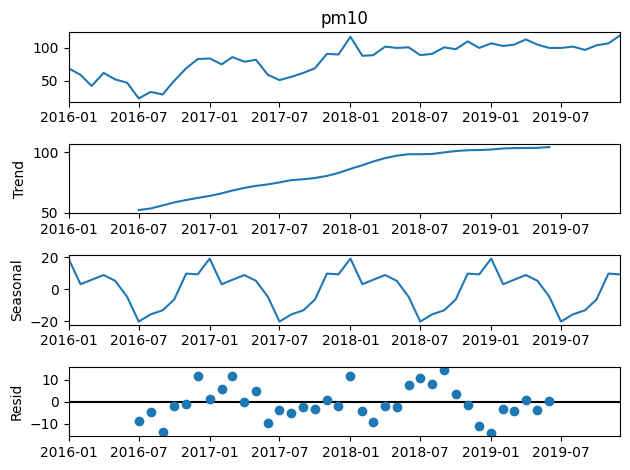

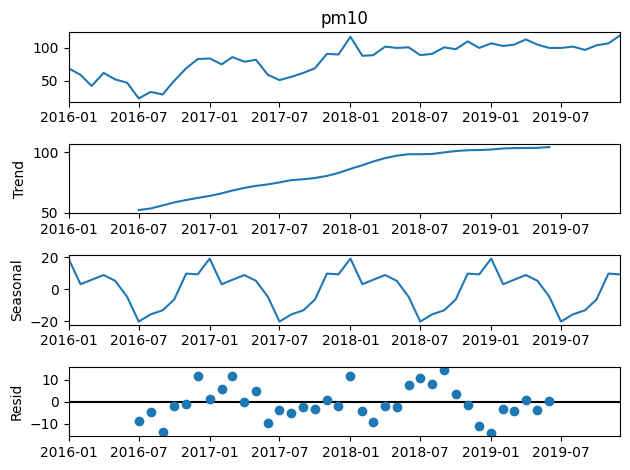

In [109]:
decompose_result = seasonal_decompose(train, period=12 ,model='add')
decompose_result.plot()

In [110]:
trend=(decompose_result.trend.shift(-12)/decompose_result.trend).mean()

In [111]:
april_pm10_mean=(df1["pm10"][3]+df1["pm10"][15]+df1["pm10"][27]+df1["pm10"][39])/4
april_pm10_mean*=trend
df1["pm10"][51]=april_pm10_mean
april_pm10_mean

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1288\1112867136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["pm10"][51]=april_pm10_mean


113.89019090193362

In [112]:
may_pm10_mean=(df1["pm10"][4]+df1["pm10"][16]+df1["pm10"][28]+df1["pm10"][40])/4
may_pm10_mean*=trend
df1["pm10"][52]=may_pm10_mean
may_pm10_mean

108.4516143700997

In [113]:
train=df1["SO2"][:72]
test=df1["SO2"][72:]

In [ ]:
train

In [114]:
from statsmodels.tsa.seasonal import seasonal_decompose

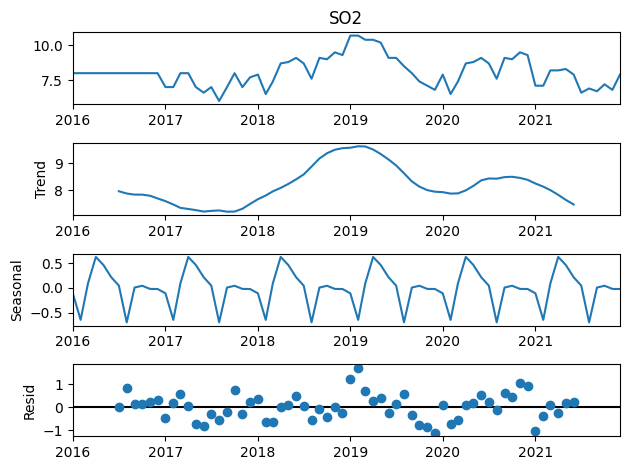

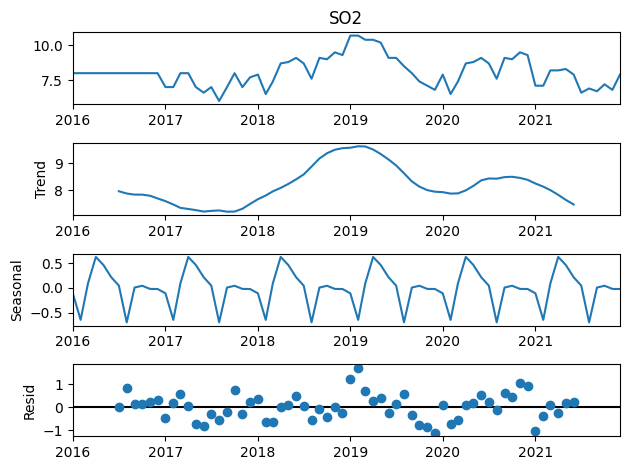

In [115]:
decompose_result = seasonal_decompose(train, period=12 ,model='add')
decompose_result.plot()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing  

In [116]:
karimnagar_so2 = ExponentialSmoothing(
    df1["SO2"],
    seasonal_periods=12,
    trend="mul",
    seasonal="mul", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

prediction= karimnagar_so2.forecast(len(test))

for i in range(len(test)):
    print("Prediction:{}   Expected:{}".format(prediction[i], test[i]))
rmse= mse(test, prediction, squared=False)
print("RMSE: ",rmse)
mape1= mape(test, prediction)
print("MAPE: %.2f" %(mape1*100),"%")

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Prediction:6.194097679476027   Expected:7.8
Prediction:5.8161221153989375   Expected:6.4
Prediction:6.230945744524142   Expected:6.8
Prediction:6.63372877185198   Expected:8.0
Prediction:6.400516268599027   Expected:6.3
Prediction:6.2831519522224095   Expected:6.4
Prediction:6.168517686029448   Expected:7.0
Prediction:5.697114705758797   Expected:6.0
Prediction:6.149490302903871   Expected:6.7
Prediction:6.237950925336766   Expected:6.7
Prediction:6.1715048740477005   Expected:6.2
Prediction:6.300189802902717   Expected:6.2
RMSE:  0.7328378078270702
MAPE: 7.72 %


In [ ]:
for i in range(len(test)):
    print("Prediction:{}   Expected:{}".format(prediction[i], test[i]))
rmse= mse(test, prediction, squared=False)
print(rmse)
mape1= mape(test, prediction)
print(mape1)

In [ ]:
train1=df1["pm10"][:72]
test1=df1["pm10"][72:]

In [ ]:
karimnagar_pm10 = ExponentialSmoothing(
    train1,
    seasonal_periods=12,
    trend="mul",
    seasonal="add", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

prediction1= karimnagar_pm10.forecast(len(test))
for i in range(len(test1)):
    print("Prediction:{}   Expected:{}".format(prediction1[i], test1[i]))
rmse= mse(test1, prediction1, squared=False)
print("RMSE: ",rmse)
mape1= mape(test1, prediction1)
print("MAPE: %.2f" %(mape1*100),"%")

In [ ]:
train2=df1["Nox"][:72]
test2=df1["Nox"][72:]

In [ ]:
karimnagar_nox = ExponentialSmoothing(
    train2,
    seasonal_periods=12,
    trend="mul",
    seasonal="mul", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

prediction2= karimnagar_nox.forecast(len(test))
for i in range(len(test1)):
    print("Prediction:{}   Expected:{}".format(prediction2[i], test2[i]))
rmse= mse(test2, prediction2, squared=False)
print("RMSE: ",rmse)
mape1= mape(test2, prediction2)
print("MAPE: %.2f" %(mape1*100),"%")

In [ ]:
type(prediction2)

In [ ]:
karimnagar_so2 = ExponentialSmoothing(
    df1["SO2"],
    seasonal_periods=12,
    trend="mul",
    seasonal="mul", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

pred_2023_SO2= karimnagar_so2.forecast(len(test))

In [ ]:
karimnagar_nox = ExponentialSmoothing(
    df1['Nox'],
    seasonal_periods=12,
    trend="mul",
    seasonal="add", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

pred_2023_NOx= karimnagar_nox.forecast(len(test))

In [ ]:
karimnagar_pm10 = ExponentialSmoothing(
    df1['pm10'],
    seasonal_periods=12,
    trend="mul",
    seasonal="add", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

pred_2023_PM10= karimnagar_pm10.forecast(len(test))

In [ ]:
pred= pd.DataFrame(data=pred_2023_SO2, columns=['SO2'])
pred['PM10']=pred_2023_PM10
pred['NOx']=pred_2023_NOx

In [ ]:
pred

In [ ]:
## PM10 Sub-Index calculation
def PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

pred["PM10_SubIndex"] = pred["PM10"].apply(lambda x: PM10_subindex(x))

In [ ]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    else:
        return 0

pred["NOx_SubIndex"] = pred['NOx'].apply(lambda x: get_NOx_subindex(x))

In [ ]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    else:
        return 0

pred["SO2_SubIndex"] = pred["SO2"].apply(lambda x: get_SO2_subindex(x))

In [ ]:
pred

In [ ]:
for i in range(len(pred)):
    pred["AQI"][i]= max(pred["SO2_SubIndex"][i],pred["PM10_SubIndex"][i],pred["NOx_SubIndex"][i])

In [ ]:
pred

In [106]:
pred.to_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Prediction\\karimnagar_aqi_prediction1.csv")